In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from nightscout import Nightscout
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ns = Nightscout()
data = ns.find()

connecting to localhost:27017/Nightscout as root, pw password


601.0


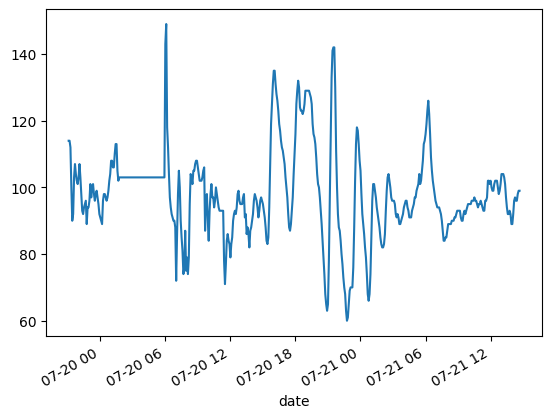

<Axes: >

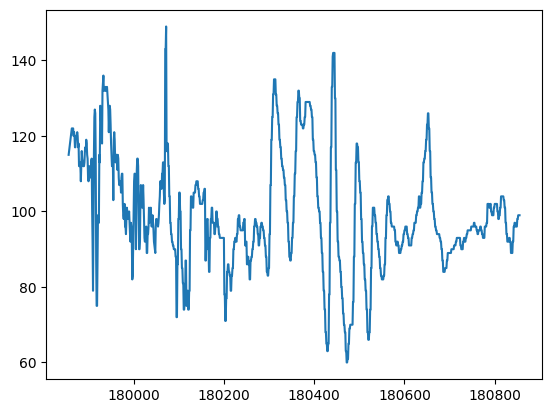

In [69]:
ns.entries
# print(ns.entries['ts'].min())
# print(ns.entries['ts'][0] + )
# ns.entries.iloc[::-1]['ts']
print(abs((ns.entries.iloc[0]['ts'] - ns.entries.iloc[2]['ts']).total_seconds()))
df = ns.align().iloc[::-1]
df['sgv'].plot()
plt.show()
ns.entries['sgv'][-1000:].plot()

<Axes: >

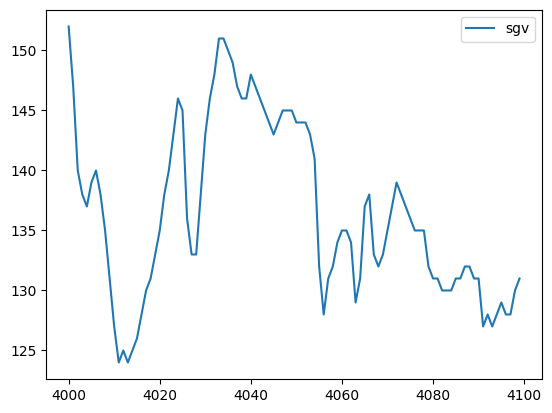

In [17]:
ns.entries[4000:4100][['sgv']].plot()

<Axes: >

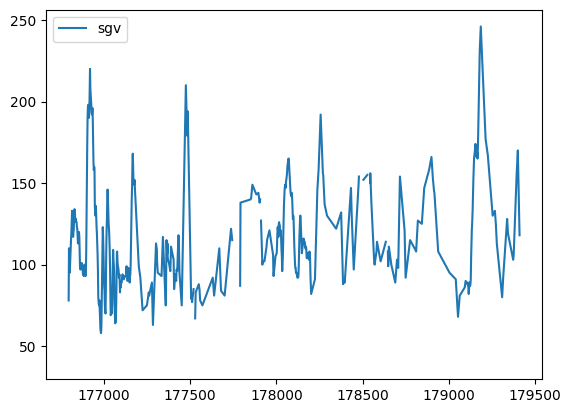

In [7]:
data[data['device']=='loop://Dexcom/G6/21.0'][['sgv']][-500:].plot()

In [30]:
ns.entries['device'].unique()

array(['share2', 'loop://Dexcom/G6/21.0', 'loop://iPhone',
       'loop://Dexcom/G7/1.0'], dtype=object)

<Axes: >

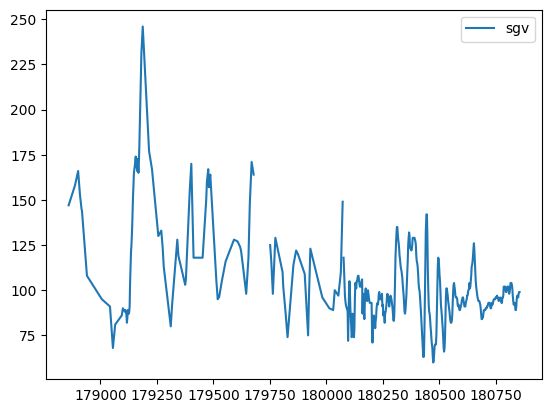

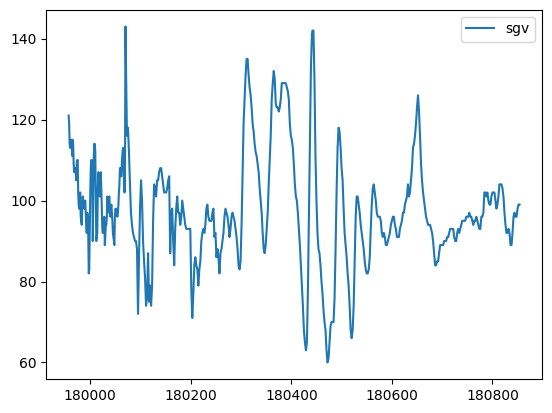

In [43]:
ns.entries[ns.entries['device']=='loop://Dexcom/G6/21.0'][['sgv']][-500:].plot()
ns.entries[ns.entries['device']=='share2'][['sgv']][-500:].plot()
# ns.entries[['device']]


In [10]:
data[data['device']=='loop://Dexcom/G6/21.0'][-4000:]


,_id,sgv,date,dateString,trend,direction,device,type,utcOffset,sysTime,trendRate,isCalibration,mbg
164775,647f027905264c5abfc3a3ee,103.0,1.686044e+12,2023-06-06T09:39:47.000Z,4,Flat,loop://Dexcom/G6/21.0,sgv,0,2023-06-06T09:39:47.000Z,-0.3,False,NaN
164792,647f140505264c5abfc3ac31,103.0,1.686050e+12,2023-06-06T11:09:47.000Z,4,Flat,loop://Dexcom/G6/21.0,sgv,0,2023-06-06T11:09:47.000Z,0.0,False,NaN
164823,647f372f05264c5abfc3bce7,126.0,1.686059e+12,2023-06-06T13:39:47.000Z,4,Flat,loop://Dexcom/G6/21.0,sgv,0,2023-06-06T13:39:47.000Z,0.8,False,NaN
164864,647f660f05264c5abfc3d440,81.0,1.686071e+12,2023-06-06T16:59:47.000Z,4,Flat,loop://Dexcom/G6/21.0,sgv,0,2023-06-06T16:59:47.000Z,-0.6,False,NaN
164873,647f6f6e05264c5abfc3d91d,117.0,1.686073e+12,2023-06-06T17:39:47.000Z,3,FortyFiveUp,loop://Dexcom/G6/21.0,sgv,0,2023-06-06T17:39:47.000Z,1.5,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179374,64b59a570d7e1da6a28aa303,103.0,1.689623e+12,2023-07-17T19:45:14.000Z,4,Flat,loop://Dexcom/G6/21.0,sgv,0,2023-07-17T19:45:14.000Z,0.8,False,NaN
179377,64b59caf0d7e1da6a28aa4e6,106.0,1.689624e+12,2023-07-17T19:55:14.000Z,4,Flat,loop://Dexcom/G6/21.0,sgv,0,2023-07-17T19:55:14.000Z,0.7,False,NaN
179394,64b5af700d7e1da6a28ab3b4,155.0,1.689629e+12,2023-07-17T21:15:14.000Z,4,Flat,loop://Dexcom/G6/21.0,sgv,0,2023-07-17T21:15:14.000Z,0.6,False,NaN
179401,64b5b6780d7e1da6a28ab98e,170.0,1.689630e+12,2023-07-17T21:45:14.000Z,4,Flat,loop://Dexcom/G6/21.0,sgv,0,2023-07-17T21:45:14.000Z,0.3,False,NaN


In [20]:
ns.treatments.columns

!cache miss, fetching from db


Index(['_id', 'enteredBy', 'eventType', 'carbs', 'protein', 'insulin',
       'created_at', 'utcOffset', 'boluscalc', 'glucose', 'glucoseType',
       'units', 'notes', 'duration', 'splitNow', 'splitExt', 'amount',
       'absolute', 'syncIdentifier', 'automatic', 'rate', 'timestamp', 'temp',
       'insulinType', 'absorptionTime', 'userEnteredAt', 'foodType',
       'programmed', 'type', 'unabsorbed', 'reason', 'correctionRange',
       'insulinNeedsScaleFactor', 'ts'],
      dtype='object')

In [29]:
# ns.treatments['insulin'].unique()
entries_s = ns.entries.shift(1)
ns.entries['ts'] - entries_s['ts']



0                    NaT
1        0 days 00:05:01
2        0 days 00:05:00
3        0 days 00:04:59
4        0 days 00:05:01
               ...      
180851   0 days 00:00:01
180852   0 days 00:04:59
180853   0 days 00:00:01
180854   0 days 00:04:59
180855   0 days 00:00:01
Name: ts, Length: 180856, dtype: timedelta64[ns]

In [47]:
food = treatments[treatments['carbs'] > 0]
food[['carbs','insulin','created_at' , 'timestamp']]

,carbs,insulin,created_at,timestamp
0,49.0,3.50,2021-11-13T14:24:00.000Z,NaN
1,55.0,4.00,2021-11-13T16:38:23.854Z,NaN
2,8.0,NaN,2021-11-13T19:01:04.661Z,NaN
4,30.5,2.65,2021-11-13T20:11:45.360Z,NaN
5,60.0,3.50,2021-11-13T23:28:16.721Z,NaN
...,...,...,...,...
7886,9.0,NaN,2023-07-17T13:16:37.000Z,2023-07-17T13:16:37Z
7893,9.0,NaN,2023-07-17T15:07:27.000Z,2023-07-17T15:07:27Z
7913,46.0,NaN,2023-07-17T19:01:45.000Z,2023-07-17T19:01:45Z
7933,40.0,NaN,2023-07-17T23:25:39.000Z,2023-07-17T23:25:39Z


In [56]:
pd.set_option('display.max_rows', None)

data[-200:]

,_id,sgv,date,dateString,trend,direction,device,type,utcOffset,sysTime,trendRate,isCalibration,mbg
179248,64b510120d7e1da6a28a37e8,137.0,1.689588e+12,2023-07-17T09:55:14.000Z,4,Flat,share2,sgv,0,2023-07-17T09:55:14.000Z,NaN,NaN,NaN
179249,64b5113b0d7e1da6a28a38b5,136.0,1.689588e+12,2023-07-17T10:00:14.000Z,4,Flat,share2,sgv,0,2023-07-17T10:00:14.000Z,NaN,NaN,NaN
179250,64b512670d7e1da6a28a3994,137.0,1.689588e+12,2023-07-17T10:05:13.000Z,4,Flat,share2,sgv,0,2023-07-17T10:05:13.000Z,NaN,NaN,NaN
179251,64b513930d7e1da6a28a3a75,135.0,1.689589e+12,2023-07-17T10:10:14.000Z,4,Flat,share2,sgv,0,2023-07-17T10:10:14.000Z,NaN,NaN,NaN
179252,64b514be0d7e1da6a28a3b61,134.0,1.689589e+12,2023-07-17T10:15:14.000Z,4,Flat,share2,sgv,0,2023-07-17T10:15:14.000Z,NaN,NaN,NaN
179253,64b515ef0d7e1da6a28a3c42,130.0,1.689589e+12,2023-07-17T10:20:14.000Z,4,Flat,share2,sgv,0,2023-07-17T10:20:14.000Z,NaN,NaN,NaN
179254,64b517170d7e1da6a28a3d10,126.0,1.689590e+12,2023-07-17T10:25:13.000Z,4,Flat,share2,sgv,0,2023-07-17T10:25:13.000Z,NaN,NaN,NaN
179255,64b518440d7e1da6a28a3dde,130.0,1.689590e+12,2023-07-17T10:30:14.000Z,4,Flat,loop://Dexcom/G6/21.0,sgv,0,2023-07-17T10:30:14.000Z,-0.2,False,NaN
179256,64b5186c0d7e1da6a28a3e07,130.0,1.689590e+12,2023-07-17T10:30:13.000Z,4,Flat,share2,sgv,0,2023-07-17T10:30:13.000Z,NaN,NaN,NaN
179257,64b5196f0d7e1da6a28a3ebe,131.0,1.689590e+12,2023-07-17T10:35:13.000Z,4,Flat,share2,sgv,0,2023-07-17T10:35:13.000Z,NaN,NaN,NaN


In [54]:
# ns.get_entries(True)
# ns.entries[0:100]['sgv'].plot()
# ns.get_treatments(True)
ns.treatments[-200:]['insulin']


8084    0.05
8085     NaN
8086     NaN
8087     NaN
8088    0.05
        ... 
8279     NaN
8280     NaN
8281     NaN
8282     NaN
8283    0.30
Name: insulin, Length: 200, dtype: float64

In [46]:
ns.treatments

,_id,enteredBy,eventType,carbs,protein,insulin,created_at,utcOffset,boluscalc,glucose,...,absorptionTime,userEnteredAt,foodType,programmed,type,unabsorbed,reason,correctionRange,insulinNeedsScaleFactor,ts
0,618fd6d43af1cd96a593beec,patrick,Meal Bolus,49.0,0,3.50,2021-11-13T14:24:00.000Z,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-11-13 14:24:00+00:00
1,618fe9ff3af1cd96a593cfca,patrick,Bolus Wizard,55.0,NaN,4.00,2021-11-13T16:38:23.854Z,0,"{'profile': 's', 'eventTime': '2021-11-13T16:3...",112.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-11-13 16:38:23.854000+00:00
2,61900b743af1cd96a593ebba,patrick,Carb Correction,8.0,NaN,NaN,2021-11-13T19:01:04.661Z,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-11-13 19:01:04.661000+00:00
3,61900b993af1cd96a593ebd2,patrick,Exercise,NaN,NaN,NaN,2021-11-13T19:01:43.118Z,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-11-13 19:01:43.118000+00:00
4,61901c013af1cd96a593f80d,patrick,Bolus Wizard,30.5,NaN,2.65,2021-11-13T20:11:45.360Z,0,"{'profile': 's', 'eventTime': '2021-11-13T20:1...",137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-11-13 20:11:45.360000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8276,64b9d2d20d7e1da6a28e5a94,loop://iPhone,Temp Basal,NaN,NaN,NaN,2023-07-21T00:35:29.000Z,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-21 00:35:29+00:00
8277,64b9d2d20d7e1da6a28e5a96,loop://iPhone,Temp Basal,NaN,NaN,NaN,2023-07-21T01:00:00.000Z,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-21 01:00:00+00:00
8278,64b9d7830d7e1da6a28e5f01,loop://iPhone,Temp Basal,NaN,NaN,NaN,2023-07-21T00:55:30.000Z,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-21 00:55:30+00:00
8279,64b9db070d7e1da6a28e6239,loop://iPhone,Temp Basal,NaN,NaN,NaN,2023-07-21T01:10:30.000Z,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-21 01:10:30+00:00


In [47]:
ns.treatments[['timestamp', 'created_at','ts']]

,timestamp,created_at,ts
0,NaN,2021-11-13T14:24:00.000Z,2021-11-13 14:24:00+00:00
1,NaN,2021-11-13T16:38:23.854Z,2021-11-13 16:38:23.854000+00:00
2,NaN,2021-11-13T19:01:04.661Z,2021-11-13 19:01:04.661000+00:00
3,NaN,2021-11-13T19:01:43.118Z,2021-11-13 19:01:43.118000+00:00
4,NaN,2021-11-13T20:11:45.360Z,2021-11-13 20:11:45.360000+00:00
...,...,...,...
8276,2023-07-21T00:35:29Z,2023-07-21T00:35:29.000Z,2023-07-21 00:35:29+00:00
8277,2023-07-21T01:00:00Z,2023-07-21T01:00:00.000Z,2023-07-21 01:00:00+00:00
8278,2023-07-21T00:55:30Z,2023-07-21T00:55:30.000Z,2023-07-21 00:55:30+00:00
8279,2023-07-21T01:10:30Z,2023-07-21T01:10:30.000Z,2023-07-21 01:10:30+00:00


<Axes: >

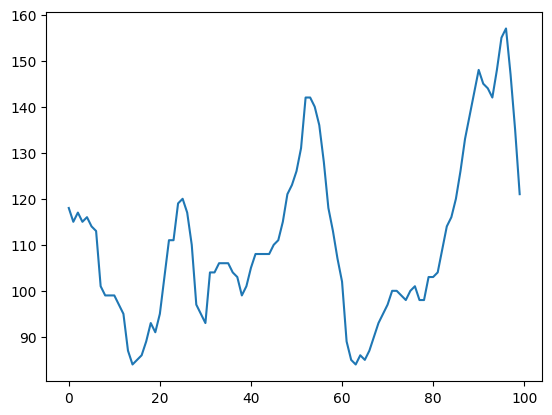

In [28]:
entres_slice = ns.entries[0:100].sort_values(by=['dateString']).reset_index(drop=True)
entres_slice['sgv'].plot()

In [77]:
ns.find('devicestatus').iloc[-10]['loop']

AttributeError: 'Nightscout' object has no attribute 'devicestatus'